# OPTIMIZATION METHODS IN STRUCTURAL ENGINEERS

Optimizations in structural engineering offer several advantages that can significantly enhance the design, construction, and performance of structures. Overall, optimization techniques empower structural engineers to achieve cost-effective, sustainable, and high-performing structures that meet safety requirements while maximizing resource efficiency. 


In recent years, some optimization methods that are conceptually different from the tra- ditional mathematical programming techniques have been developed such as Genetic algorithms, Simulated annealing, Particle swarm optimization, Ant colony optimization, Fuzzy optimization, Neural-network-based methods,... These methods are labeled as modern or nontraditional methods of optimization.

In this topic we will discuss two following methods:
1. Genetic algorithms
2. Neural-network-based methods

Genetic algorithms are optimization techniques inspired by the process of natural selection and genetics. They are used to find optimal solutions to complex problems by simulating the principles of evolution and genetic recombination (initialization, evaluation, selection, reproduction, replacement, termination).

Neural network-based methods, often referred to as neural networks or artificial neural networks, are computational models inspired by the structure and functioning of biological brains. They consist of interconnected nodes, called neurons, organized in layers that process and transmit information. Neural network-based methods offer several advantages, including their ability to learn complex patterns from large datasets, adaptability to different problem domains, and the potential for parallel processing. However, they may require extensive computational resources, significant training data, and careful.


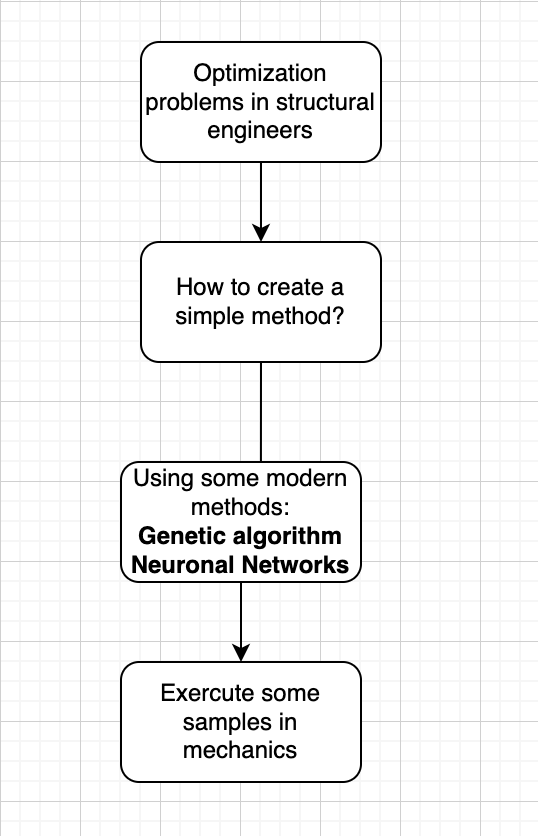


## Problems in structural engineers

The general problem in structural engineers is to find a set of variables $\bf{X}$ $=\{x_1, x_2,...,x_n\}^T$ which minimines the objective function $f(\bf{X})$ that satisfy constraints: 

    $g_1(\bf{X})$= $\alpha$
    
    $$g_2(\bf{X})\leq \beta$$
    
    $$g_3(\bf{X})\geq \eta$$



# Create a simple optimization method
First, let's start with an approximation problem. We assume that we need to find the optimal values for variables  (x,y,z) that makes the function $F(x,y,z)$ approximate a given real number α.

This problem can be formulated as finding the root of the equation  $f(x,y,z)=F(x,y,z)-\alpha=0$. 

To illustrate the concept, let's consider the following example and develop our own optimization method:

$f(x,y,z)=6x^3+9y^2+90z-25=0$

In [1]:
# This is a sample Python script.
import random

# define an objective function
# In this method, we find solution (x,y,z) that makes function f(x,y,z)=0

def OF(x,y,z):
    return 6*x**3+9*y**2+90*z-25

# fitness function (the minimum error makes the fitness function maximized)
def fitness(x,y,z):
    ans=OF(x,y,z)

    if ans==0:
        return 99999
    else:
        return abs(1/ans)

# Generate solutions: get 1000 random solutions then check which one return the minimum error 
solutions=[]
for s in range(1000):
    solutions.append((random.uniform(0,10000),
                      random.uniform(0,10000),
                      random.uniform(0,10000)))

# save the best solutions in one list    
for i in range(10000):
    ranksolutions=[]
    for s in solutions:
        ranksolutions.append((fitness(s[0],s[1],s[2]),s))
    ranksolutions.sort()
    ranksolutions.reverse()

    #print(f"=== Gen {i} best solutions ===")
    #print(ranksolutions[0])
    if ranksolutions[0][0]>9999:
        break
    # chose 100 best solutions and genberate again 
    bestsolutions=ranksolutions[:100]

    elements=[]
    for s in bestsolutions:
        elements.append(s[1][0])
        elements.append(s[1][1])
        elements.append(s[1][2])

    newGen=[]
    for _ in range(1000):
        e1=random.choice(elements)*random.uniform(0.99,1.01)
        e2 = random.choice(elements)*random.uniform(0.99,1.01)
        e3 = random.choice(elements)*random.uniform(0.99,1.01)

        newGen.append((e1,e2,e3))
    solutions=newGen



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print(f" The fitness value is {ranksolutions[0][0]}")
    s=ranksolutions[0][1]
    print(f"The best solution is {s}")
    ans=OF(s[0],s[1],s[2])
    print(f"The error of the method {abs(ans)}")


 The fitness value is 43907.6736181827
The best solution is (0.2707989582371054, 0.27049127973746995, 0.2691375942774762)
The error of the method 2.277506225212278e-05


# Using scipy.minimize
https://docs.scipy.org/doc/scipy/tutorial/optimize.html

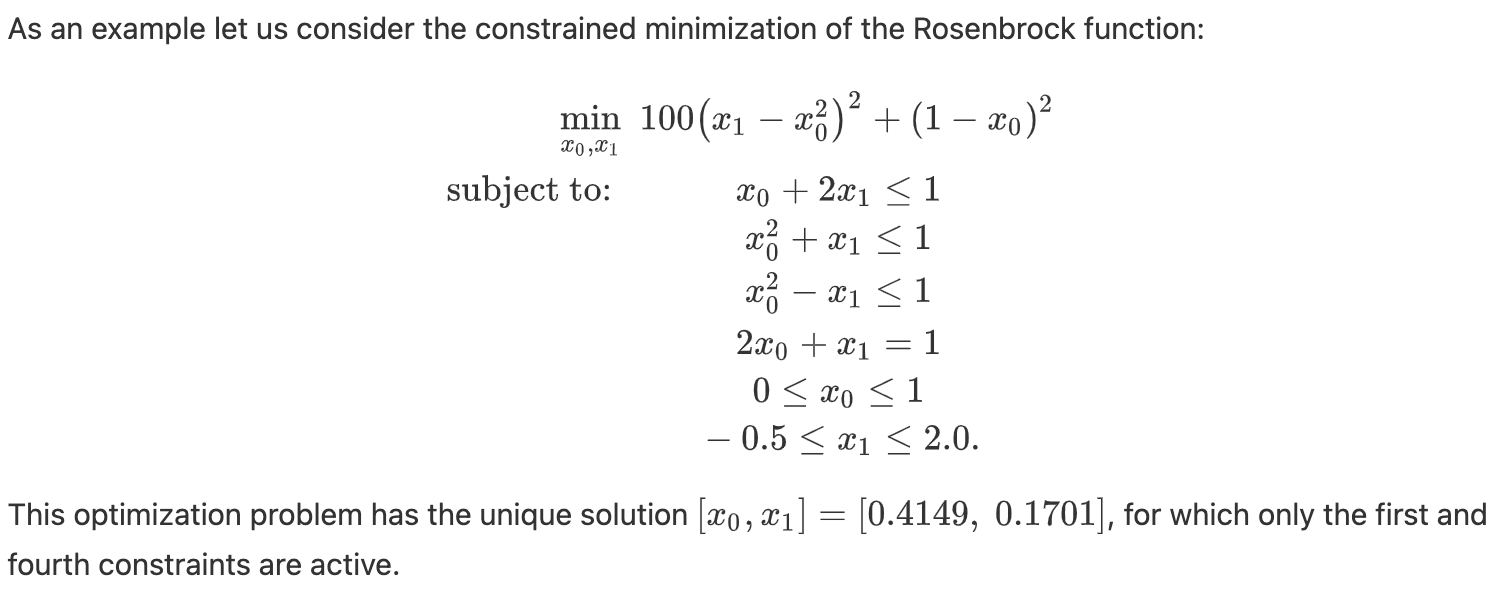
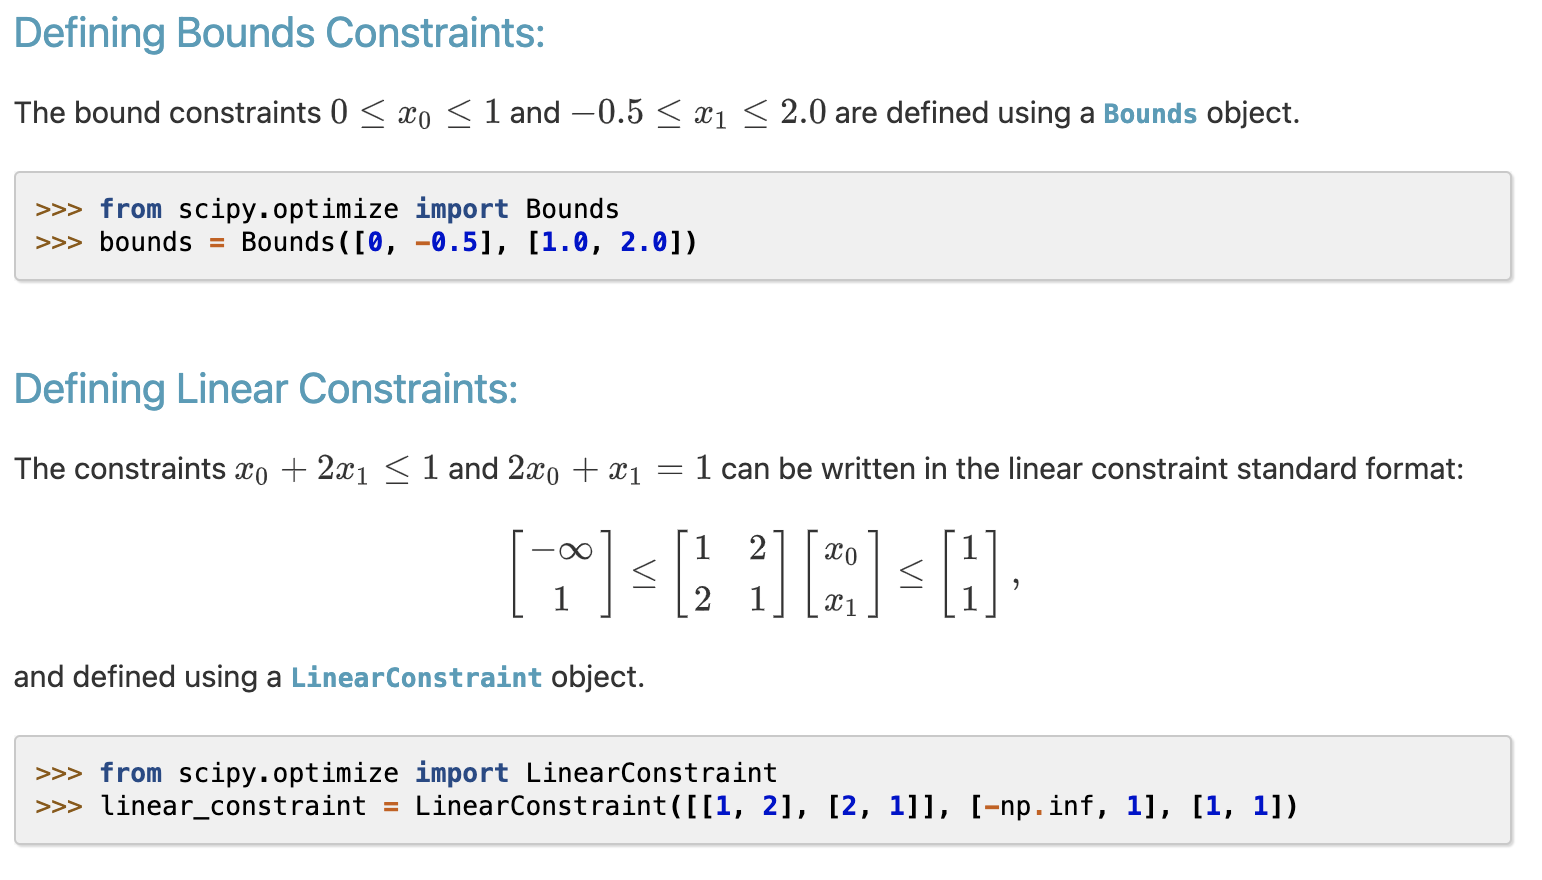
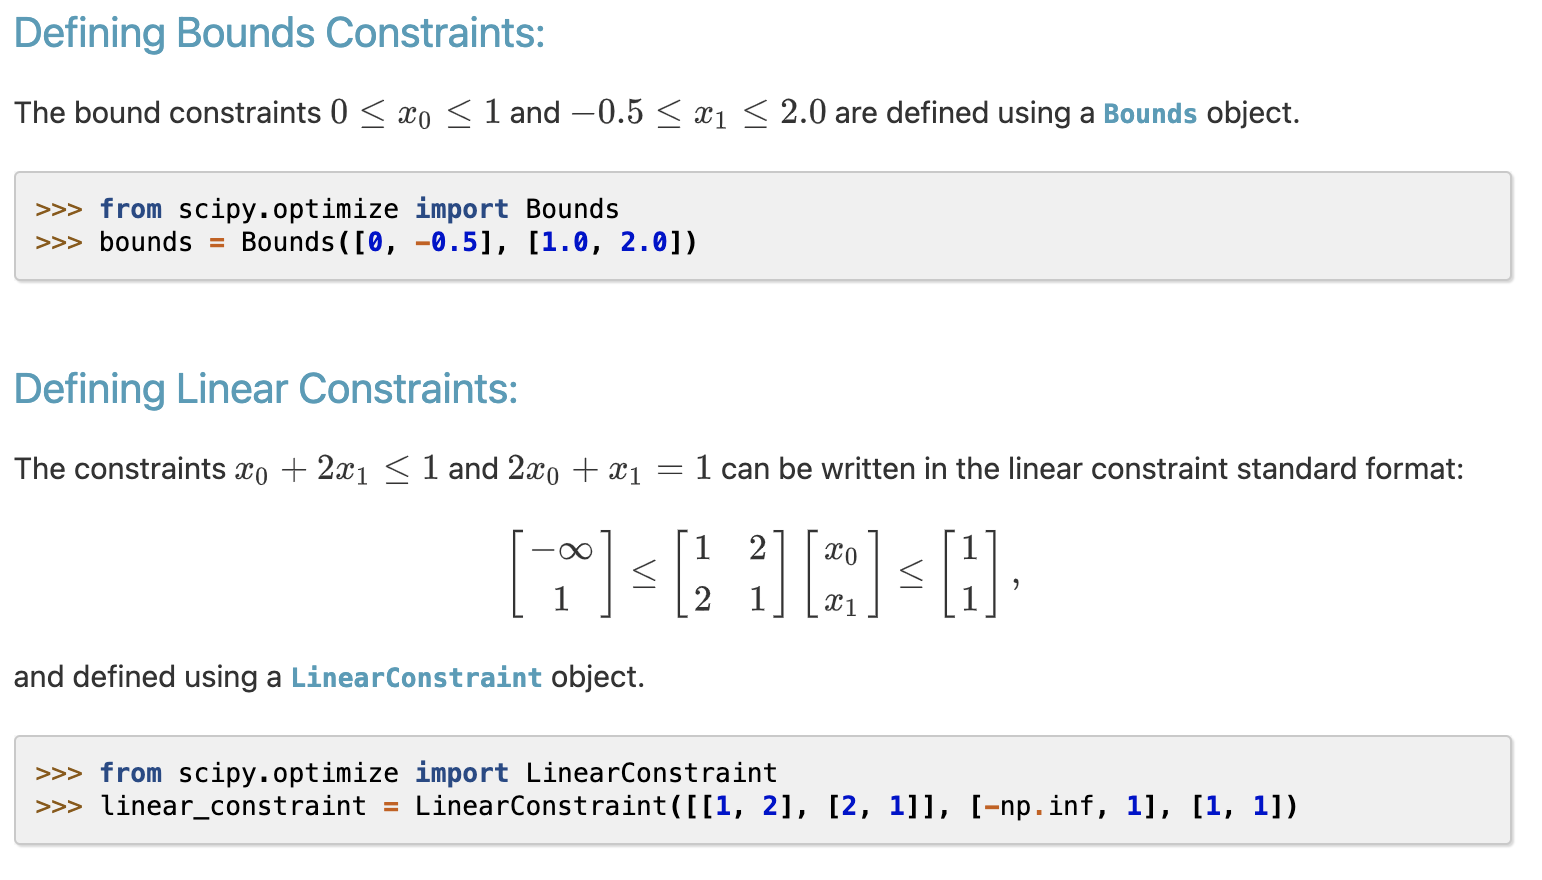
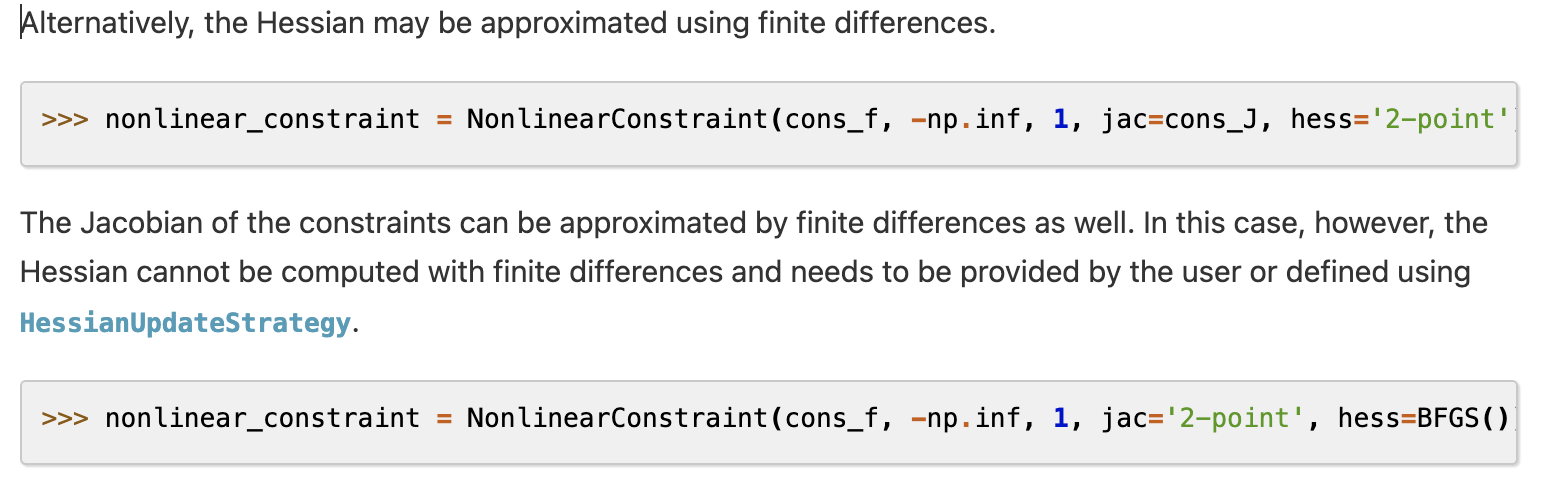
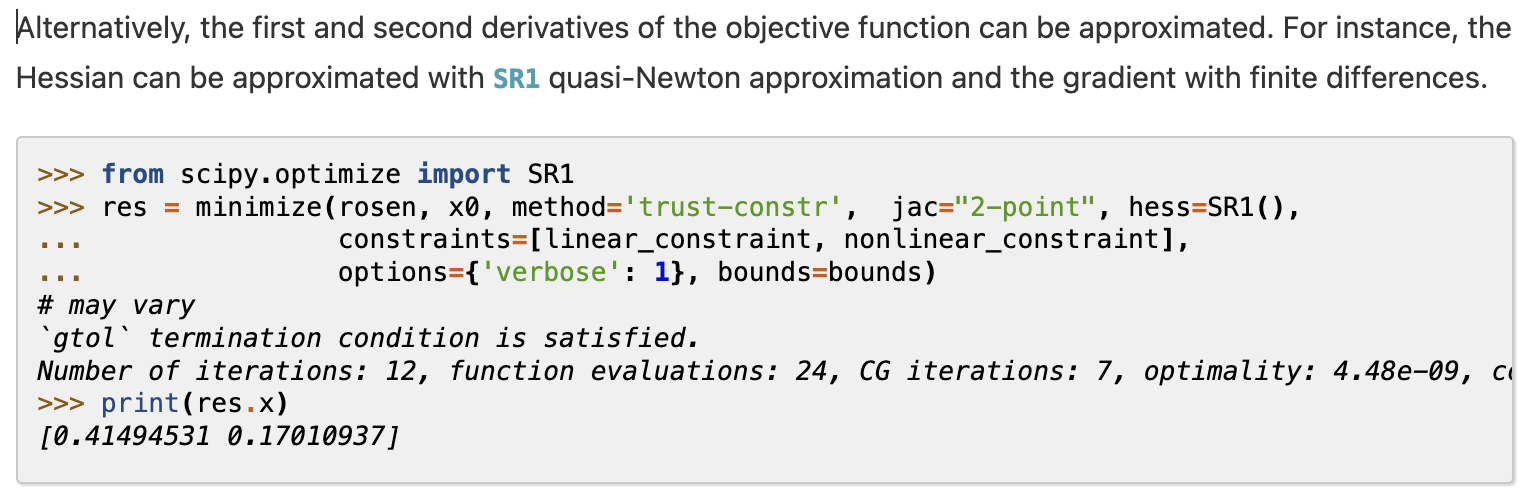

In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
from scipy.optimize import SR1

# Define the Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return 100.0*(x[1]-x[0]**2)**2 + (1-x[0])**2

# Boundaries
bounds = Bounds([0, -0.5], [1.0, 2.0])

# Linear Constraints
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

# Nonlinear Constraints
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess=BFGS())

# Initial guess
x0 = np.array([1.3, 0.7])

# Apply the minimize method
res = minimize(rosen, x0, method='trust-constr', jac='2-point', hess=SR1(),
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)

print(res.x)
print(res.fun)

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, CG iterations: 8, optimality: 4.44e-09, constraint violation: 0.00e+00, execution time:  2.2 s.
[0.41494531 0.17010937]
0.34271757564429556


# Genetic Algorithm Methods
The package was developed by Ryan Solgi:
https://pypi.org/project/geneticalgorithm/



In [3]:
#!pip install geneticalgorithm

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga


### Optimized function with constraints

Now consider that we want to minimize $f(X)=x_1+x_2+x_3$ where $\bf{X}$ is a set of real variables in [0,10]. Also we have an extra constraint so that sum of $x_1$ and $x_2$ is equal or greater than $2$. The minimum of $f(X)$ is $2$. In such a case, a trick is to define penalty function.

 The best solution found:                                                                           
 [1.47964671 0.52121847 0.00183192]

 Objective function:
 2.002697098998927


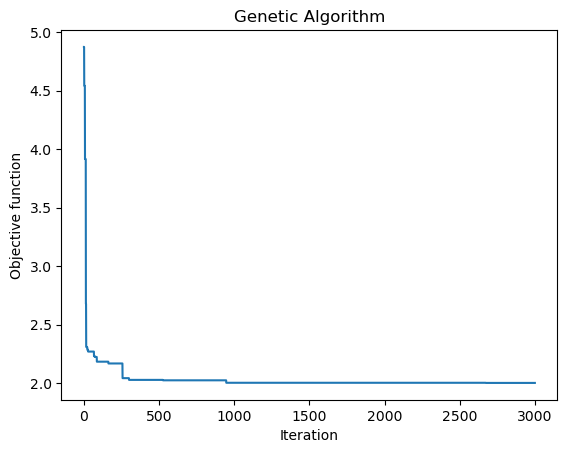

In [5]:

# Optimized function with constraints

def OF(X):
    x1,x2,x3=X
    pen=0
    if x1+x2<2:
        pen=30+1000*(2-x1-x2)
    return np.sum(X)+pen



def f(X):
    pen = 0
    if X[0] + X[1] < 2:
        pen = 500 + 1000 * (2 - X[0] - X[1])
    return np.sum(X) + pen


varbound = np.array([[0, 10]] * 3)




algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, \
           dimension=3, \
           variable_type='real', \
           variable_boundaries=varbound, \
           algorithm_parameters=algorithm_param)

model.run()

### Weistrass function
http://infinity77.net/global_optimization/test_functions_nd_W.html

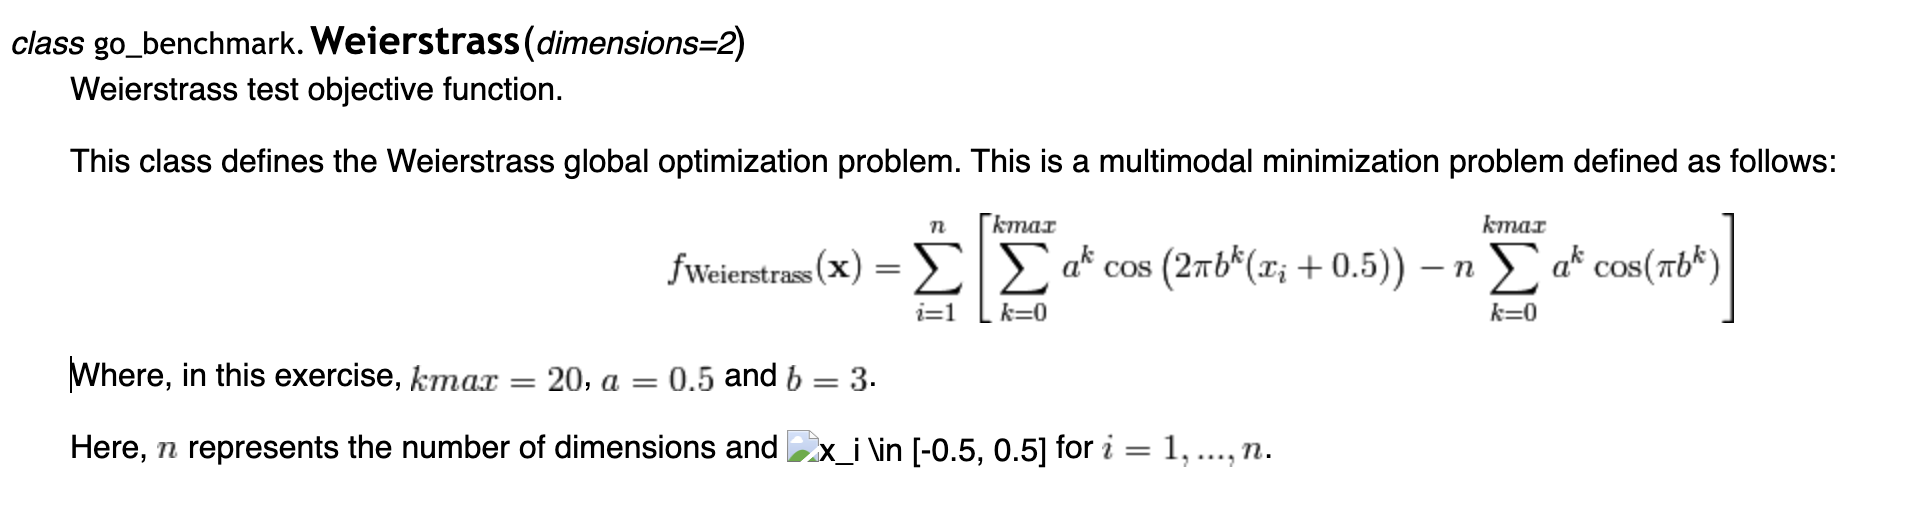

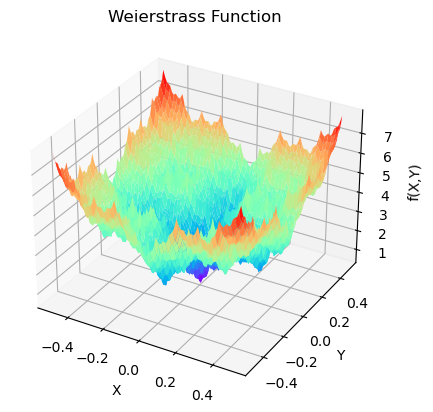

In [6]:

#Weierstrass Function_______________________________________

def f(X):
    dim = len(X)

    a = 0.5
    b = 3
    kmax=20
    OF = 0
    for i in range(0, dim):
        t1 = 0
        for k in range(0, kmax+1):
            t1 += (a ** k) * math.cos((2 * math.pi * (b ** k)) * (X[i] + 0.5))
        OF += t1
    t2 = 0
    for k in range(0, kmax+1):
        t2 += (a ** k) * math.cos(math.pi * (b ** k))
    OF -= dim * t2

    return OF


varbound = np.array([[-0.5, 0.5]] * 2)

algorithm_param = {'max_num_iteration': 2000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=f, dimension=2, \
           variable_type='real', \
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)


#Plot
# Generate data points
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = f([X[i][j], Y[i][j]])

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.set_title('Weierstrass Function')

# Show the plot
plt.show()




 The best solution found:                                                                           
 [6.67012131e-09 1.31867925e-06]

 Objective function:
 0.001080947064155069


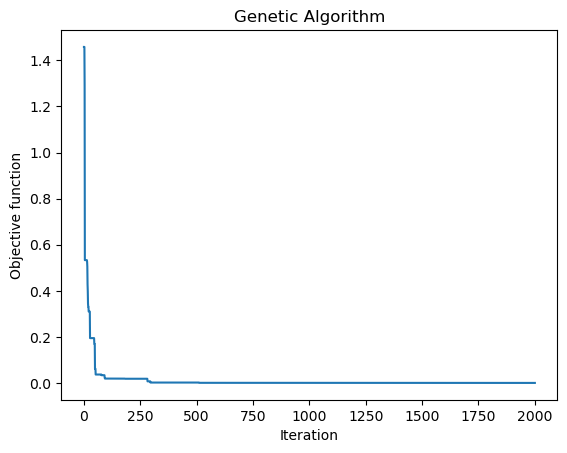

In [7]:
model.run()

### One example has written in Matlab
https://es.mathworks.com/help/gads/constrained-minimization-using-ga.html#gaconstrained-2
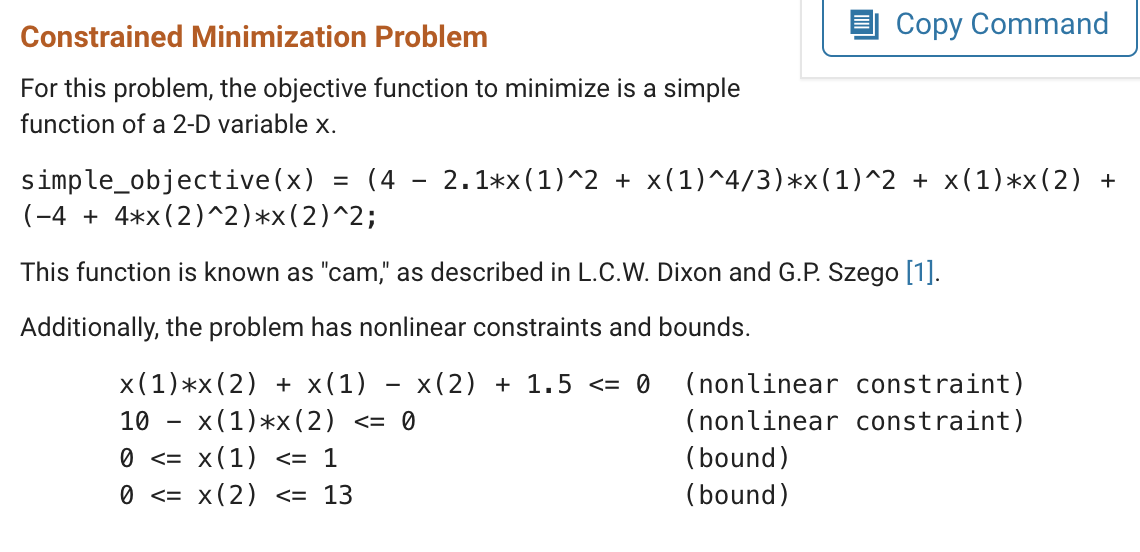

 The best solution found:                                                                           
 [ 0.8116556  12.32050312]

 Objective function:
 91571.28158367479


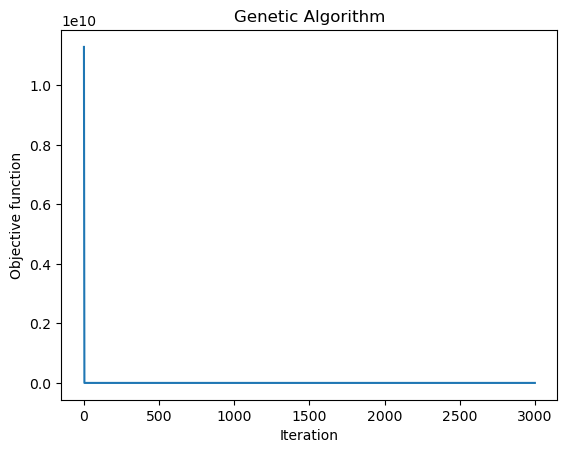

Best Solution: [ 0.8116556  12.32050312]
Best Fitness: 91571.28158367479


In [8]:
def simple_objective(x):
    x1 = x[0]
    x2 = x[1]
    y = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

    # Penalty terms for constraints
    penalty = 0.0
    c = [1.5 + x1 * x2 + x1 - x2, -x1 * x2 + 10]
    for constraint in c:
        if constraint > 0:
            penalty +=1e10*constraint

    return y + penalty

varbound = np.array([[0, 1], [0, 13]])
algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.2, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=simple_objective, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

best_solution = model.best_variable
best_fitness = model.best_function

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Mechanics problems

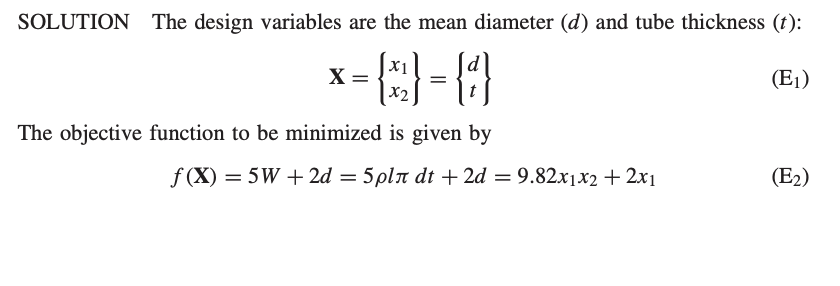
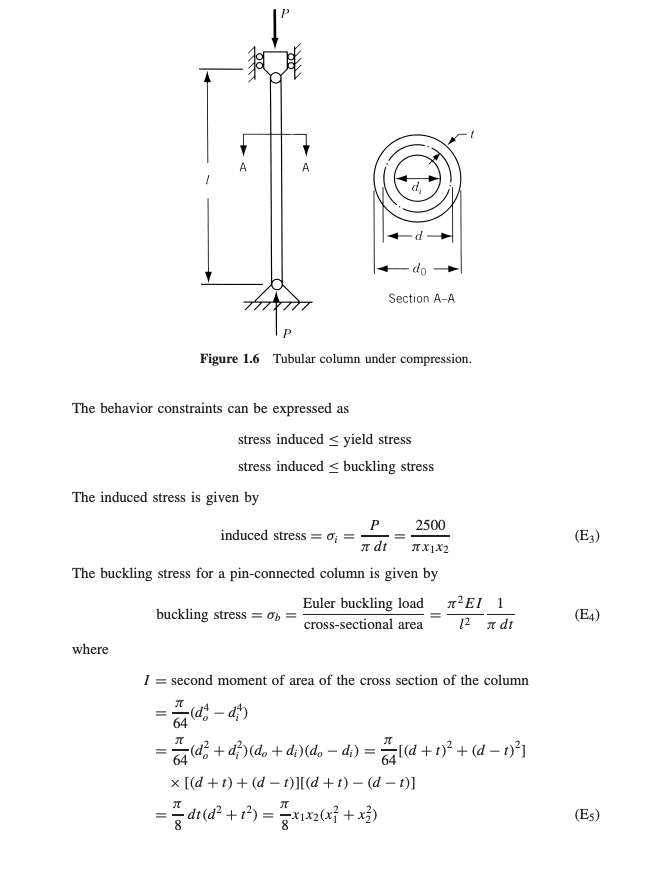
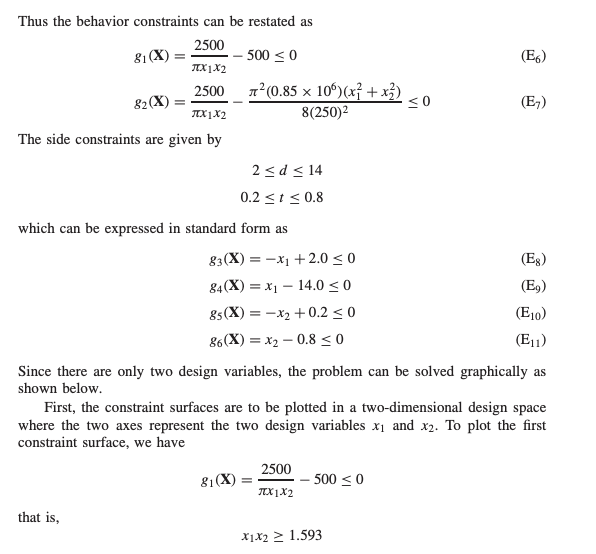
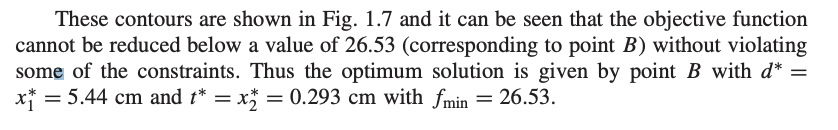

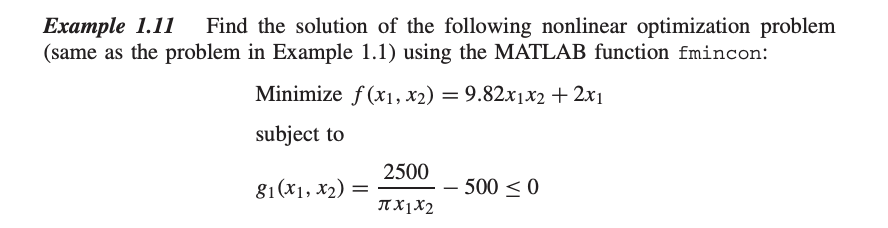

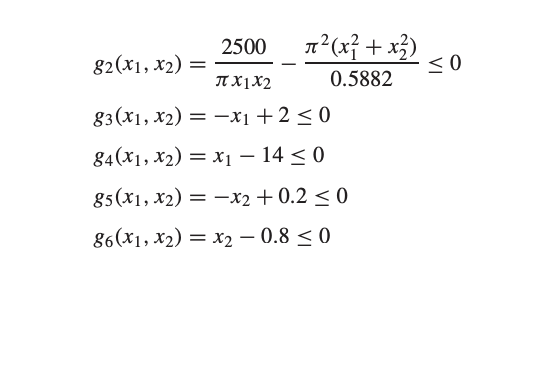

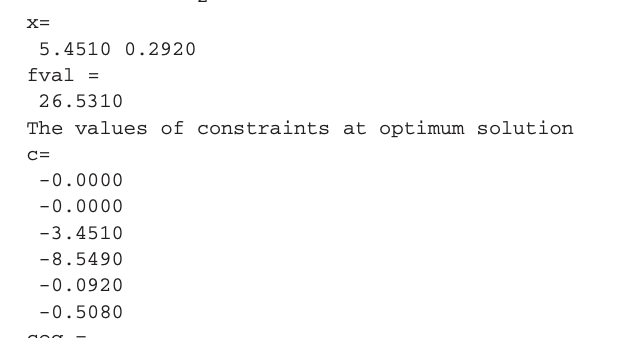

## Solved with GA

 The best solution found:                                                                           
 [5.43793884 0.29406599]

 Objective function:
 26.57916610466212


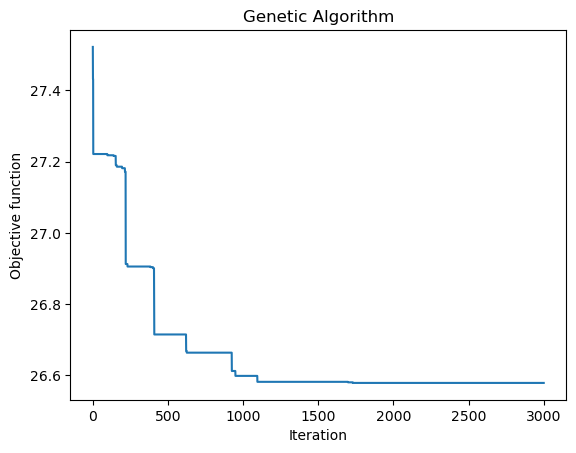

In [9]:
# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1=2500/(np.pi*x1*x2)-500
    c2=2500/(np.pi*x1*x2)-np.pi**2*(x1**2+x2**2)/0.5882
    
    return [c1,c2]
    

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y=9.82*x1*x2+2*x1
    penalty = 0.0
    
    for constraint in constraints(X):
        if constraint > 0:
            penalty +=10000+1e20*constraint

    return y + penalty

# Define the optimization problem
varbound = np.array([[2, 14],[0.2,0.8]])


algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 200, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()


## Solved with minimze

In [10]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
from scipy.optimize import Bounds
from scipy.optimize import SR1


In [11]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint, BFGS, Bounds

# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1 = 2500 / (np.pi * x1 * x2) - 500
    c2 = 2500 / (np.pi * x1 * x2) - np.pi**2 * (x1**2 + x2**2) / 0.5882
    return [c1, c2]

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y = 9.82 * x1 * x2 + 2 * x1
    penalty = 0.0
    for constraint in constraints(X):
        if constraint > 0:
            penalty += 10000 + 1e10 * constraint
    return y + penalty

# Define the optimization problem
bounds = Bounds([2, 0.2], [14, 0.8])
nonlinear_constraint = NonlinearConstraint(constraints, -np.inf, 0)
x_guess = [5.2, 0.25]

result = minimize(OF, x_guess, method='trust-constr', jac='2-point', hess=BFGS(),
                  constraints=nonlinear_constraint, bounds=bounds)

# Access the optimized solution
optimized_solution = result.x

print("Optimized Solution:", optimized_solution)
print("Optimization Result:",result.fun)




/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized Solution: [5.45101774 0.29197366]
Optimization Result: 26.531091630318258


# Neural Network

In [12]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-28 15:08:16.748307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


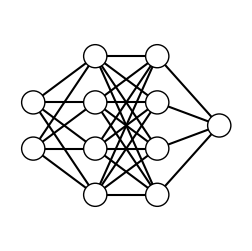

In [13]:
def draw_neural_net(left, right, bottom, top, layer_sizes):
    '''
    From https://gist.github.com/craffel/2d727968c3aaebd10359#file-draw_neural_net-py
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    fig = plt.figure(figsize=(3, 3))
    ax = fig.gca()
    ax.axis('off')

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# test the drawing
draw_neural_net(.1, .9, .1, .9, [2, 4,4, 1])


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1 = 2500 / (np.pi * x1 * x2) - 500
    c2 = 2500 / (np.pi * x1 * x2) - np.pi ** 2 * (x1 ** 2 + x2 ** 2) / 0.5882

    return [c1, c2]


# Define the Objective Function
def OF(X):
    x1, x2 = X
    y = 9.82 * x1 * x2 + 2 * x1
    penalty = 0.0

    for constraint in constraints(X):
        if constraint > 0:
            penalty +=   constraint

    return y + penalty

varbound = np.array([[2, 14], [0.2, 0.8]])

# Normalize the input data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(np.random.uniform(low=varbound[:, 0], high=varbound[:, 1], size=(1000, 2)))
y_train = np.array([OF(X) for X in X_train]).reshape(-1, 1)

# Define the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Get the optimized solution and its prediction
X_test = scaler.transform(np.random.uniform(low=varbound[:, 0], high=varbound[:, 1], size=(100, 2)))
optimized_solution = model.predict(X_test)
best_index = np.argmin(optimized_solution)
best_solution = scaler.inverse_transform(X_test[best_index].reshape(1, -1))
best_prediction = optimized_solution[best_index]
best_objective = OF(best_solution.flatten())  # Calculate the objective function value for the best solution

# Print the best solution, its prediction, and the objective function value
print("Best Solution:")
print(best_solution)
print("Best Prediction:")
print(best_prediction)
print("Objective Function Value:")
print(best_objective)

Epoch 1/100


/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35185/2859646180.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  c1 = 2500 / (np.pi * x1 * x2) - 500
/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35185/2859646180.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  c2 = 2500 / (np.pi * x1 * x2) - np.pi ** 2 * (x1 ** 2 + x2 ** 2) / 0.5882


32/32 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00          
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
E